# TASK 3

# OBJECTIVE: Build a decision tree classifier to preditc whether a customer will purchase a service or product based on their demographic and behavioural data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [5]:
data = pd.read_csv('iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
X = data.drop('species', axis=1)  # Features
y = data['species'] 

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
X_encoded=pd.get_dummies(X, drop_first=True)

In [11]:
X_train,x_test, Y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
clf=DecisionTreeClassifier(random_state=42)

clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred= clf.predict(x_test)

In [15]:
print("No. of features in X_train:",len(X_train.columns))
print("No. of features in x_test:",len(x_test.columns))

No. of features in X_train: 4
No. of features in x_test: 4


In [16]:
print("Feature names:", X_train.columns)

Feature names: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [18]:
accuracy=accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
classification_rep=classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



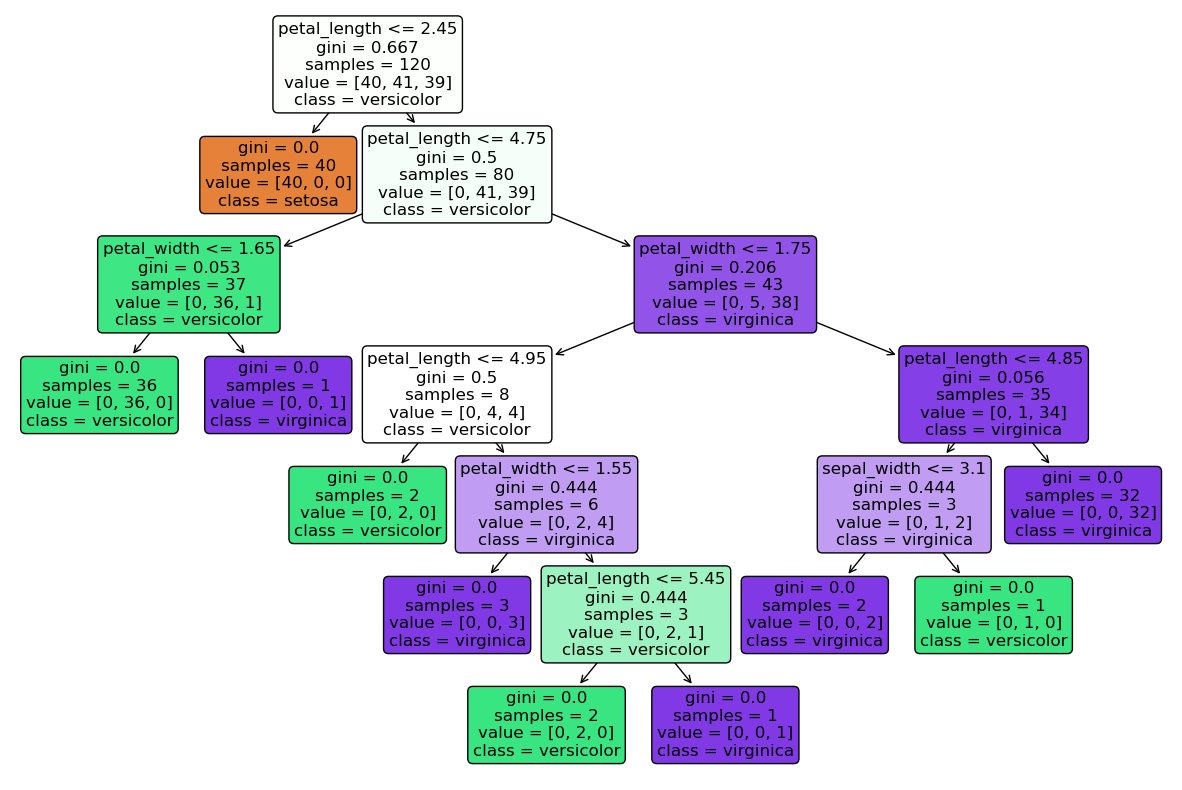

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=list(y.unique()), rounded=True, fontsize=12)
plt.show()

Inference: Accuracy of 1.00 implies that the model correctly predicted all instances in the test set. In the confusion matrix, all entries outside the diagonal are zero, meaning there are no misclassifications. Precision measure and recall measure is 1.00 for all classes meaning that there are no false positives and false negatives respectively. There is a perfect balance between the precision and recall measure, as implied by 1.00 F1 score for all classes. 
Support refers to the number of occurrences of each class in the test dataset. It's 10 for setosa, 9 for versicolor, and 11 for virginica.

Overall, the model seems to be performing exceptionally well on the given dataset.